## Import gerais

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo os dados

In [5]:
DATA_PATH = "../data/transformed/transformed_data.csv"

In [6]:
df = pd.read_csv(DATA_PATH)
df.sample(5)

,id_voluntario,cor_pele,cor_olhos,cor_cabelo_15_anos,rs1426654,rs6058017,rs1800404,rs16891982
135,37,Preta,Preto,Preto,GA,AA,AA,CG
177,79,Parda,Castanho,Castanho,GA,AA,GA,CG
145,47,Parda,Castanho,Preto,GA,AA,GA,CC
159,61,Branca,Castanho,Castanho,AA,AA,AA,GG
237,139,Parda,Castanho,Castanho,GA,AA,GA,NaN


# RandomForest

## Sklearn imports

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

## Usando OneHotEncoder para converter os atributos categóricos

In [8]:
X = df[['rs1426654','rs6058017','rs1800404', 'rs16891982']]
X = X.fillna('null')

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)


## Função para separar os sets

In [9]:
def split_sets(y, ts=0.3):
     return train_test_split(X_encoded, df[y],
                            test_size=ts,
                            random_state=41)

## Avaliação de performance RF com diferentes valores de árvores

In [10]:
def rforest_test(X_train, X_test, y_train, y_test):
    results = []

    for num in range(20, 201, 20):
        model = RandomForestClassifier(
        n_estimators=num,
        # max_depth=5,
        random_state=41,
        n_jobs=-1
        )

        cv_scores = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy')

        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)


        results.append({
            'n_estimators': num,
            'train_score': train_score,
            'val_score': cv_scores.mean(),
            'model': model
            })

        print(f"""
        Trees: {num:3d} |
        Train: {train_score:.4f} |
        Validation (CV): {cv_scores.mean():.4f}
        """)

    return pd.DataFrame(results)

## Visualização da perfomance do modelo no treinamento em comparação com a validação

In [11]:
def plot_accuracy(results):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    ax.plot(results['n_estimators'], results['train_score'],
    label='Treino (Aprendizado)', marker='o')
    ax.plot(results['n_estimators'], results['val_score'],
    label='Validação (Generalização)', marker='s')

    ax.set_xlabel('Número de árvores (n_estimators)')
    ax.set_ylabel('Precisão')
    ax.set_title('Perfomance do modelo: Treino x Cross-Validation')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.show()

## Validação final com o set de teste

In [12]:
def best_performance(results, X_test, y_test):
    best_run = results.loc[results['val_score'].idxmax()]
    best_model = best_run['model']

    print(f"\nBest Model: {best_run['n_estimators']} trees")
    print("--- Final Test Set Evaluation ---")

    y_pred_final = best_model.predict(X_test)
    print(classification_report(y_test, y_pred_final))

# Teste com a CEV cor de pele

In [13]:
X_train, X_test, y_train, y_test = split_sets('cor_pele')

results = rforest_test(X_train, X_test, y_train, y_test)


        Trees:  20 |
        Train: 0.7358 |
        Validation (CV): 0.6115
        

        Trees:  40 |
        Train: 0.7409 |
        Validation (CV): 0.5909
        

        Trees:  60 |
        Train: 0.7409 |
        Validation (CV): 0.5961
        

        Trees:  80 |
        Train: 0.7409 |
        Validation (CV): 0.5909
        

        Trees: 100 |
        Train: 0.7409 |
        Validation (CV): 0.6012
        

        Trees: 120 |
        Train: 0.7409 |
        Validation (CV): 0.6115
        

        Trees: 140 |
        Train: 0.7409 |
        Validation (CV): 0.5906
        

        Trees: 160 |
        Train: 0.7409 |
        Validation (CV): 0.5905
        

        Trees: 180 |
        Train: 0.7409 |
        Validation (CV): 0.5905
        

        Trees: 200 |
        Train: 0.7409 |
        Validation (CV): 0.5802
        


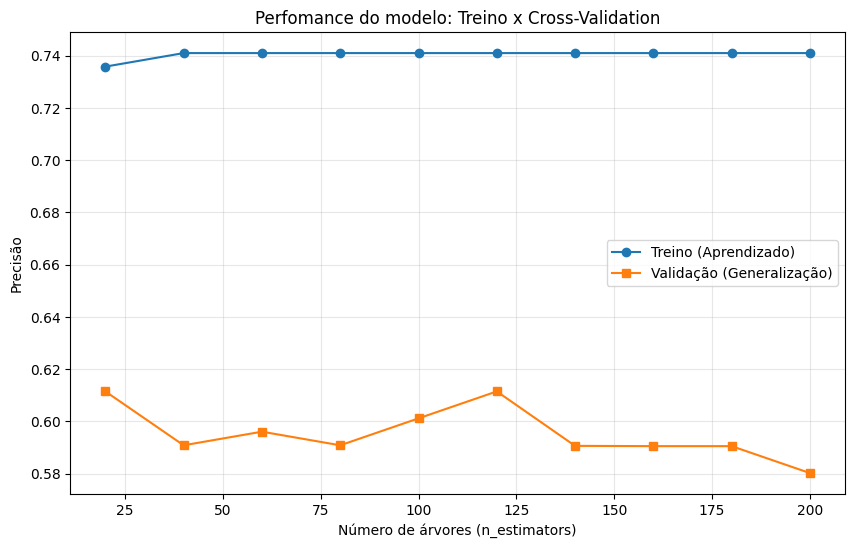

In [14]:
plot_accuracy(results)

In [15]:
best_performance(results, X_test, y_test)


Best Model: 20 trees
--- Final Test Set Evaluation ---
              precision    recall  f1-score   support

     Amarela       0.00      0.00      0.00         5
      Branca       0.48      0.47      0.48        34
    Indígena       0.00      0.00      0.00         1
       Parda       0.45      0.63      0.52        35
       Preta       0.00      0.00      0.00         9

    accuracy                           0.45        84
   macro avg       0.19      0.22      0.20        84
weighted avg       0.38      0.45      0.41        84



/home/ruantos/.cache/pypoetry/virtualenvs/predicao-fenotipica-lYeH511r-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ruantos/.cache/pypoetry/virtualenvs/predicao-fenotipica-lYeH511r-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ruantos/.cache/pypoetry/virtualenvs/predicao-fenotipica-lYeH511r-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

# Teste com a CEV cor do cabelo

In [16]:
X_train, X_test, y_train, y_test = split_sets('cor_cabelo_15_anos')

results = rforest_test(X_train, X_test, y_train, y_test)


        Trees:  20 |
        Train: 0.7772 |
        Validation (CV): 0.6788
        

        Trees:  40 |
        Train: 0.7720 |
        Validation (CV): 0.6736
        

        Trees:  60 |
        Train: 0.7720 |
        Validation (CV): 0.6736
        

        Trees:  80 |
        Train: 0.7720 |
        Validation (CV): 0.6736
        

        Trees: 100 |
        Train: 0.7772 |
        Validation (CV): 0.6736
        

        Trees: 120 |
        Train: 0.7772 |
        Validation (CV): 0.6736
        

        Trees: 140 |
        Train: 0.7772 |
        Validation (CV): 0.6736
        

        Trees: 160 |
        Train: 0.7772 |
        Validation (CV): 0.6736
        

        Trees: 180 |
        Train: 0.7772 |
        Validation (CV): 0.6736
        

        Trees: 200 |
        Train: 0.7772 |
        Validation (CV): 0.6736
        


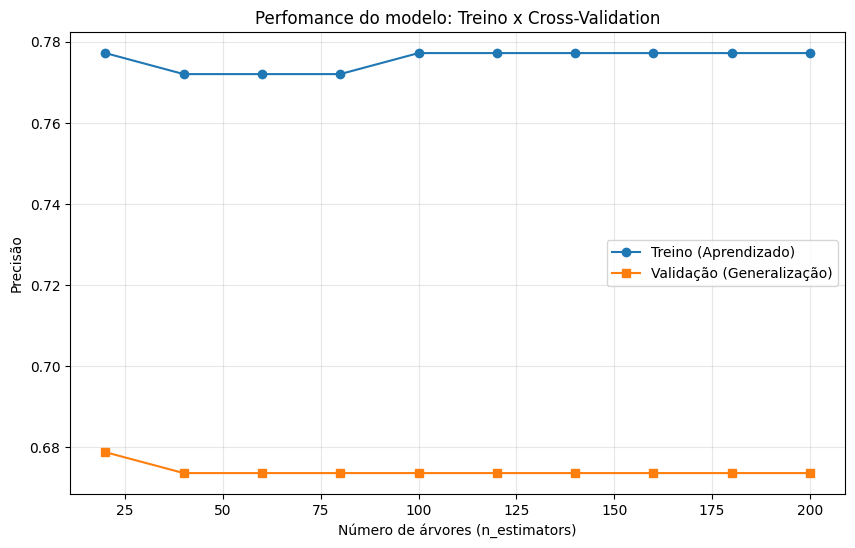

In [17]:
plot_accuracy(results)

In [18]:
best_performance(results, X_test, y_test)


Best Model: 20 trees
--- Final Test Set Evaluation ---
              precision    recall  f1-score   support

    Castanho       0.72      0.85      0.78        61
       Louro       0.00      0.00      0.00         7
       Preto       0.30      0.19      0.23        16

    accuracy                           0.65        84
   macro avg       0.34      0.35      0.34        84
weighted avg       0.58      0.65      0.61        84



# Teste com a CEV cor dos olhos

In [19]:
X_train, X_test, y_train, y_test = split_sets('cor_olhos')

results = rforest_test(X_train, X_test, y_train, y_test)


        Trees:  20 |
        Train: 0.9067 |
        Validation (CV): 0.8808
        

        Trees:  40 |
        Train: 0.9067 |
        Validation (CV): 0.8808
        

        Trees:  60 |
        Train: 0.9067 |
        Validation (CV): 0.8860
        

        Trees:  80 |
        Train: 0.9067 |
        Validation (CV): 0.8860
        

        Trees: 100 |
        Train: 0.9067 |
        Validation (CV): 0.8860
        

        Trees: 120 |
        Train: 0.9067 |
        Validation (CV): 0.8808
        

        Trees: 140 |
        Train: 0.9067 |
        Validation (CV): 0.8808
        

        Trees: 160 |
        Train: 0.9067 |
        Validation (CV): 0.8808
        

        Trees: 180 |
        Train: 0.9067 |
        Validation (CV): 0.8808
        

        Trees: 200 |
        Train: 0.9067 |
        Validation (CV): 0.8808
        


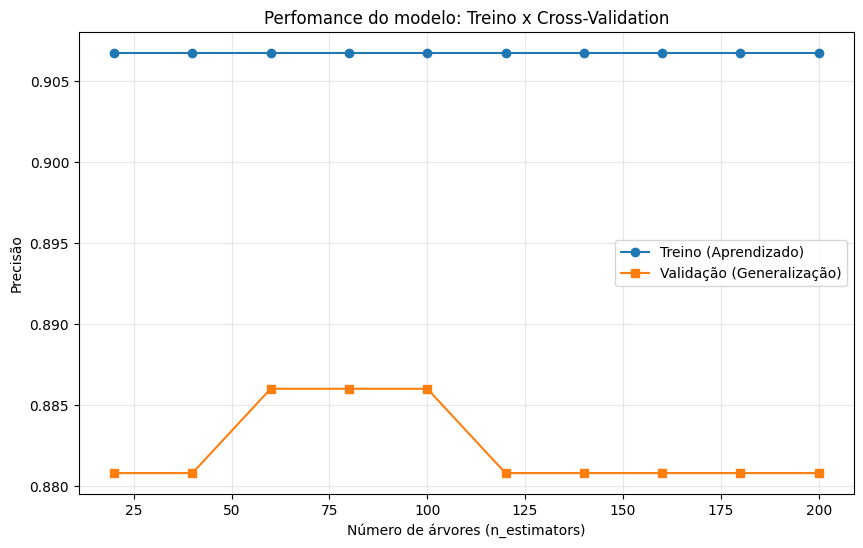

In [20]:
plot_accuracy(results)

In [21]:
best_performance(results, X_test, y_test)


Best Model: 60 trees
--- Final Test Set Evaluation ---
              precision    recall  f1-score   support

        Azul       0.00      0.00      0.00         3
    Castanho       0.87      0.99      0.92        72
       Preto       0.00      0.00      0.00         2
       Verde       0.50      0.14      0.22         7

    accuracy                           0.86        84
   macro avg       0.34      0.28      0.29        84
weighted avg       0.78      0.86      0.81        84



/home/ruantos/.cache/pypoetry/virtualenvs/predicao-fenotipica-lYeH511r-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ruantos/.cache/pypoetry/virtualenvs/predicao-fenotipica-lYeH511r-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ruantos/.cache/pypoetry/virtualenvs/predicao-fenotipica-lYeH511r-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab